About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Dataset link: Aerofit_treadmill.csv

Product Purchased:	KP281, KP481, or KP781
Age:	In years
Gender:	Male/Female
Education:	In years
MaritalStatus:	Single or partnered
Usage:	The average number of times the customer plans to use the treadmill each week.
Income:	Annual income (in $)
Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
Miles:	The average number of miles the customer expects to walk/run each week

Product Portfolio:

The KP281 is an entry-level treadmill that sells for $1,500.
The KP481 is for mid-level runners that sell for $1,750.
The KP781 treadmill is having advanced features that sell for $2,500.

What good looks like?

1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset
2. Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)
3. Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)
4. Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)
5. Check correlation among different factors using heat maps or pair plots.
6. With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
7. Customer Profiling - Categorization of users.
8. Probability- marginal, conditional probability.
9. Some recommendations and actionable insights, based on the inferences.
Later on, we will see more ways to do “customer segmentation”, but this case study in itself is relevant in some real-world scenarios.

Evaluation Criteria

1. Defining Problem Statement and Analysing basic metrics (10 Points)
    - Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
2. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)
3. Visual Analysis - Univariate & Bivariate (30 Points)
    - For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)
    - For categorical variable(s): Boxplot (10 Points)
    - For correlation: Heatmaps, Pairplots(10 Points)
4. Missing Value & Outlier Detection (10 Points)
5. Business Insights based on Non-Graphical and Visual Analysis (10 Points)
    - Comments on the range of attributes
    - Comments on the distribution of the variables and relationship between them
    - Comments for each univariate and bivariate plot
6. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

# Aerofit - Descriptive Statistics & Probability

**<u>About Aerofit</u>**

*Aerofit is a leading brand in the field of **fitness equipment**. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.*

**<u>Business Problem</u>**

The market research team at AeroFit wants to identify the *characteristics of the target audience for each type of treadmill* offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate *whether there are differences across the product with respect to customer characteristics.*

Perform descriptive analytics to create a *customer profile for each AeroFit treadmill product* by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [24]:
# Lets import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Use this code to style the plots - globally
plt.style.use('ggplot')
# If you want to know what all styles are available use plt.style.available


# Use this code to ignore any unnecessary filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets import the dataset

df = pd.read_csv("aerofit_treadmill.csv")

## 1. Defining Problem Statement and Analysing basic metrics

__Problem Statement__
- The market research team at AeroFit faces the challenge of insufficiently understanding the distinct characteristics of the target audience for each of the company's treadmill products. 
- In order to enhance the guidance provided to new customers, there is a need to investigate potential differences in customer traits across AeroFit treadmill products. 
- The lack of a comprehensive customer profile for each treadmill hinders the team's ability to make informed recommendations. 
- Thus, the problem at hand is to conduct a thorough descriptive analytics, utilizing appropriate tables and charts, to develop a detailed customer profile for each AeroFit treadmill. 
- Additionally, constructing two-way contingency tables and computing conditional and marginal probabilities is crucial to uncover insights that can significantly impact business decisions.

In [3]:
# Lets look at the head of the data

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


__About Dataset__

*The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:*

- Product Purchased:	KP281, KP481, or KP781
- Age:	In years
- Gender:	Male/Female
- Education:	In years
- MaritalStatus:	Single or partnered
- Usage:	The average number of times the customer plans to use the treadmill each week.
- Income:	Annual income (in \$)
- Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles:	The average number of miles the customer expects to walk/run each week

__Product Portfolio__

- The KP281 is an entry-level treadmill that sells for \$1,500.
- The KP481 is for mid-level runners that sell for \$1,750.
- The KP781 treadmill is having advanced features that sell for \$2,500.

In [4]:
# Lets look at the shape of the data

df.shape

(180, 9)

In [5]:
# Lets look at the datatypes of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


> There is no need to convert any datatypes, because all the datatypes are relevant to the values

In [6]:
# Lets look at the statistical summary

# all numeric fields

df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
# all non-numeric fields

df.describe(include='O')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


## 2. Non-Graphical Analysis: Value counts and unique attributes

In [8]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

#### Product

In [9]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

> __80__ products belong to KP281
>
> __60__ products belong to KP481
>
> __40__ products belong to KP781

In [10]:
df['Product'].describe()

count       180
unique        3
top       KP281
freq         80
Name: Product, dtype: object

#### Age

In [11]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

> The dataset include people of age between __18 years old__ and __50 years old__
>
> Average age is __28.7__

#### Gender

In [12]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [13]:
df['Gender'].value_counts(normalize=True) *100

Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

> __57.7%__ of people in the dataset are males and __42.2%__ are females.

#### Education

In [14]:
df['Education'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

> Everyone in the dataset has a min education of __12 years__
>
> Max education is __21 years__

#### Marital Status

In [15]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [16]:
df['MaritalStatus'].value_counts(normalize=True)*100

Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

> __59.4%__ of the people in the dataset are Partnered and __40.5%__ of people are Single

#### Usage

In [17]:
df['Usage'].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

> Those who bought the treadmill said that they would use it on average __3 times__ a week

#### Fitness

In [19]:
df['Fitness'].describe()

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

> On a scale of 1 to 5, people who bought the treadmill said their fitness level is on average is at __3__
>
> Minimum is __1/bad shape__ and max is __5/very good shape__

#### Income

In [20]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

> Annual income of the people who bought the treadmill ranges from __\$29k per year__ to __\$104k per year__

#### Miles

In [21]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

> On average people expects to walk/run __103.19 miles__ per week

## 3. Visual Analysis - Univariate & Bivariate

In [18]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### What is the frequency of Products sold?

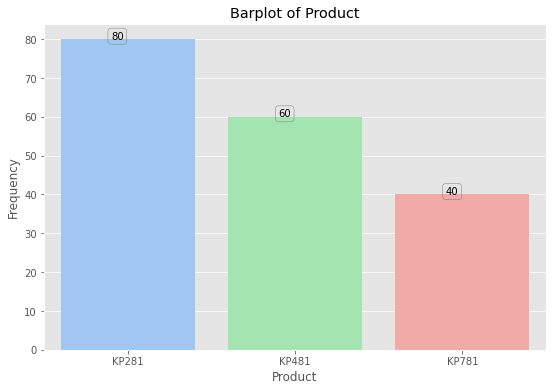

In [27]:
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(9,6))
    ax = sns.countplot(df['Product'])
    
    bias = 0.1
    ax.annotate(ax.patches[0].get_height(), (0-bias,ax.patches[0].get_height()),
                bbox=dict(boxstyle="round", fc="none", ec="gray"))
    ax.annotate(ax.patches[1].get_height(), (1-bias, ax.patches[1].get_height()),
               bbox=dict(boxstyle="round", fc="none", ec="gray"))
    ax.annotate(ax.patches[2].get_height(), (2-bias, ax.patches[2].get_height()),
               bbox=dict(boxstyle="round", fc="none", ec="gray"))
    plt.title('Barplot of Product')
    plt.xlabel('Product')
    plt.ylabel('Frequency')

> From the graph we can see that the most sold product is __KP281__ (80 units)
>
> Next in line is __KP481__ (60 units)
>
> And the lowest sold product is __KP781__ (40units)